# How to analyse semantic speech networks

This notebook demos the process of analysing semantic speech networks in an interactive notebook using netts.

### Contents:  
1. [Plotting a semantic speech network](#1.-Plotting-a-semantic-speech-network)
2. [Analysing a semantic speech network](#2.-Analysing-a-semantic-speech-network)
   1. [Basic properties](#2.1-Basic-properties)
   2. [Connected components](#2.2-Connected-components)
   3. [Advanced properties](#2.3-Advanced-properties)
3. [Analysing several networks](#3.-Analysing-several-networks)

Caroline Nettekoven\
February 2023, University of Cambridge

Find more information about netts on [my website](https://www.caroline-nettekoven.com/post/netts/), in the [netts documentation](https://alan-turing-institute.github.io/netts/) or in our [preprint](https://doi.org/10.1101/2022.02.25.22271517) (in press at [Schizophrenia Bulletin](https://academic.oup.com/schizophreniabulletin)). You can also read more about netts on the [Accelerate Science Cambridge Blog](https://acceleratescience.github.io/blog).

This notebook shows how to analyze a set of semantic speech networks created with netts. It assumes that you have already created these networks and saved them as pickle files in an output folder called `output_folder`. If you have not yet created and saved your networks, do this by following [this tutorial]()

## 1. Plotting a semantic speech network

We will start by loading one of the networks we constructed in [creating_networks.ipynb](#2.2-Python-Interface).

In [28]:
# Load the network
import pickle
with open("output_folder/transcript.pickle", "rb") as graph_file:
    network = pickle.load(graph_file)

We know plot the network using [spring-embedding](https://en.wikipedia.org/wiki/Force-directed_graph_drawing), which visualises the network such that you get the least overlapping of nodes and edges with each other. This also means that each time you plot the network, it will look slightly different. 
If you are not happy with the way your network is plotted, try re-running the plotting function and look at the your image again. The position of the nodes and edges should have changed and you can choose the version of the plot that you like best.

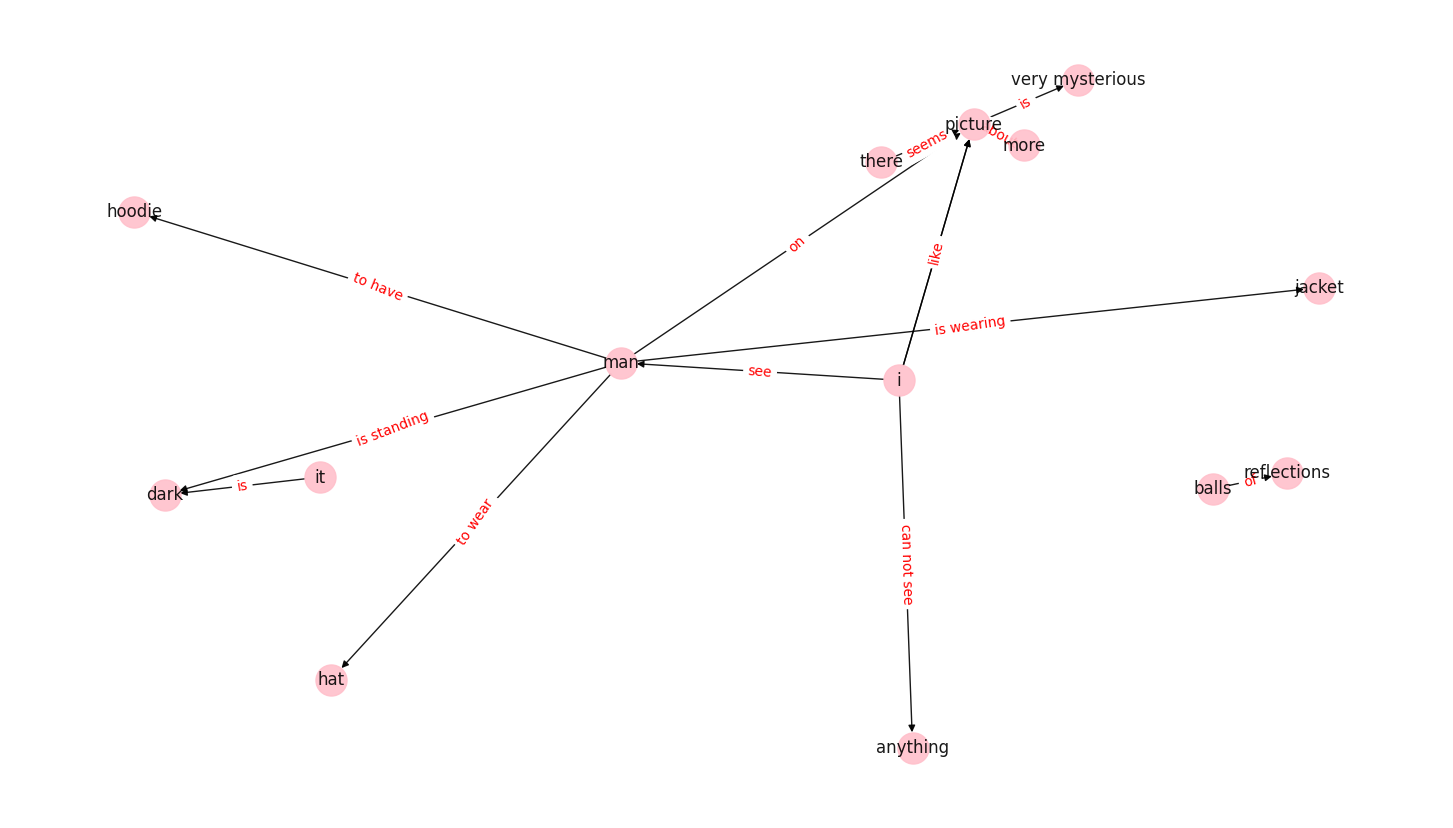

In [54]:
import matplotlib.pyplot as plt

# Plot the network
fig, ax = plt.subplots()
network.plot_graph(ax)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)



We can see the resulting network is directed, meaning a node connects to another node by a directed edge. The direction of the edge is indicated by the arrow. The network can have self-loops, where edges connect a node to itself - although this network does not have any (see the plot in [section 7](#7.-Analysing-several-networks), where some of the networks clearly show self-loops). It can also have multiple edges, where two nodes are connected by more than one edge. These properties make the network a directed [Multigraph](https://en.wikipedia.org/wiki/Multigraph).

Now let's examine the graph closer. Netts created a network object that stores all network properties, along with useful information about the transcript. To read the text from which the network was created, you can look into the `transcript` property of the network. Information about the network itself, for example the nodes and edges, are stored in the `graph` property.

Let's find out the number of characters of the original transcript, the edge and node numbers and what those nodes and edges are:

In [30]:
network.transcript # The original transcript
network.graph # The networkx graph
network.graph.nodes() # The nodes of the network
network.graph.edges() # The edges of the network

print(f'The original transcript is {len(network.transcript)} characters long and reads: \n\t"{network.transcript}"\n')
print(f'The network has {len(network.graph.nodes())*2} nodes and {len(network.graph.edges())} edges.\n')
print(f'The nodes of the network are: {list(network.graph.nodes())}\n')
print(f'The edges of the network are between the nodes: {list(network.graph.edges())}\n')

The original transcript is 485 characters long and reads: 
	"I see a man and he is wearing a jacket. He is standing in the dark against a light post. On the picture there seems to be like a park and... Or trees but in those trees there are little balls of light reflections as well. I cannot see the... Anything else because it’s very dark. But the man on the picture seems to wear a hat and he seems to have a hoodie on as well. The picture is very mysterious, which I like about it, but for me I would like to understand more about the picture."

The network has 28 nodes and 14 edges.

The nodes of the network are: ['man', 'jacket', 'i', 'dark', 'there', 'picture', 'it', 'anything', 'hoodie', 'hat', 'very mysterious', 'balls', 'reflections', 'more']

The edges of the network are between the nodes: [('man', 'jacket'), ('man', 'dark'), ('man', 'hoodie'), ('man', 'hat'), ('man', 'picture'), ('i', 'man'), ('i', 'anything'), ('i', 'picture'), ('i', 'picture'), ('there', 'picture'), ('picture', 

We can examine the edges further. They store a rich description telling us what relation they convey between the nodes, how they were derived and - in the case of semantic edges - with how much confidence. We get this information by setting the property `data=True` when calling the edges.

For example, we can see for the first edge that it represents the relation between the nodes *man* and *jacket* with the relation *is wearing*. Since *man* is the first entry in the edge information, we know that the directed edge goes from *man* to *jacket* via the relation *is wearing*. The edge was extracted by the information extraction model [OpenIE5](https://github.com/dair-iitd/OpenIE-standalone/) with a confidence of ~0.45.

In [31]:
# Get edges of the network with their attributes
edges = list(network.graph.edges(data=True))

# Describe the first edge
print(
    f'The first edge is between the nodes: >>{edges[0][0]}<< and >>{edges[0][1]}<< and connected by the relation >>{edges[0][2]["relation"]}<<.\n')

# Show all information about the first edge
edges[0]

The first edge is between the nodes: >>man<< and >>jacket<< and connected by the relation >>is wearing<<.



('man',
 'jacket',
 {'relation': 'is wearing',
  'confidence': 0.45170382506656653,
  'context': None,
  'negated': False,
  'passive': False,
  'extractor': 'ollie',
  'sentence': 0,
  'node2_args': []})

We can also look at the node degree. That is, the number of edges that touch each node. We can either count the total number for each node, or we can look separately at indegree and outdegree of each node. Indegree is the number of edges leading to the node, whereas outdegree is the number of edges leading away from the node.

In [32]:
print(f'All degrees: {network.graph.degree}')
print(f'All indegrees: {network.graph.in_degree}')
print(f'All outdegrees: {network.graph.out_degree}')

All degrees: [('man', 6), ('jacket', 1), ('i', 4), ('dark', 2), ('there', 1), ('picture', 6), ('it', 1), ('anything', 1), ('hoodie', 1), ('hat', 1), ('very mysterious', 1), ('balls', 1), ('reflections', 1), ('more', 1)]
All indegrees: [('man', 1), ('jacket', 1), ('i', 0), ('dark', 2), ('there', 0), ('picture', 5), ('it', 0), ('anything', 1), ('hoodie', 1), ('hat', 1), ('very mysterious', 1), ('balls', 0), ('reflections', 1), ('more', 0)]
All outdegrees: [('man', 5), ('jacket', 0), ('i', 4), ('dark', 0), ('there', 1), ('picture', 1), ('it', 1), ('anything', 0), ('hoodie', 0), ('hat', 0), ('very mysterious', 0), ('balls', 1), ('reflections', 0), ('more', 1)]


To examine the degree of one particular node, use the node label to get the data for this node.

In [33]:
network.graph.degree('man') # Degree of node 'man'
network.graph.in_degree('man') # Indegree of node 'man'
network.graph.out_degree('man') # Outdegree of node 'man'

print(f'The node "man" has a total degree of {network.graph.degree("man")}')
print(f'Of those, {network.graph.in_degree("man")} edge is going in and {network.graph.out_degree("man")} edges are going out.')


The node "man" has a total degree of 6
Of those, 1 edge is going in and 5 edges are going out.


These are just some of the properties that could be useful for anaysing the networks. For convenience, netts provides several functions to extract these features quickly from the semantic speech networks. We will discuss these in the next section.

We can save the plotted network as a .png file.

In [34]:
# Save the graph image
plt.savefig("output_folder/transcript_1.png")

<Figure size 640x480 with 0 Axes>

## 2. Analysing a semantic speech network

Netts provides functions that calculate a number of properties on the graph.
These functions are part of the netts module `analyze`. 
Let's import the module and describe the network.


In [35]:
from netts import analyze

### 2.1 Basic properties

As a first description, we can calculate some basic properties of the network using the function `calculate_basic_descriptors`.

In [36]:
n_words, n_sents, n_nodes, n_edges, n_unconnected_nodes, average_total_degree = analyze.calculate_basic_descriptors(
    network.graph)

print(f'The Speech Graph has {n_words} words, {n_sents} sentences, {n_nodes} nodes, {n_edges} edges, {n_unconnected_nodes} unconnected nodes, and an average total degree of {average_total_degree}.')

The Speech Graph has 101 words, 6 sentences, 14 nodes, 14 edges, 4 unconnected nodes, and an average total degree of 2.0.



This function returns the following properties:


| Property              | Description                                           |
| --------------------- | ----------------------------------------------------- |
| n_words               | Number of words in the transcript                     |
| n_sents               | Number of sentences in the transcript                 |
| n_nodes               | Number of nodes in the network                        |
| n_edges               | Number of edges in the network                        |
| n_unconnected_nodes   | Number of unconnected nodes in the network            |
| average_total_degree  | Average total degree of the network                   |


The number of unconnected nodes in the network are the entitites that the speaker mentioned, but didn't talk about in relation to another entity. So the speaker did not semantically connect this node to another node.
For example, if the speaker said:
>"Mountain... Pencil... Episode..."

Then the semantic speech network would have three unconnected nodes ('Mountain', 'Pencil', and 'Episode').

We can also calculate recurrence measures. For exampe, the number of loops with one, two or three nodes could be informative. In the case of our current graph, we have no closed loops, but we will later look at networks that do.

In [37]:
L1, L2, L3 = analyze.calculate_recurrence_measures(network.graph)
print(f'The Speech Graph has {L1} self-loops, {L2} cycles of length 2, and {L3} cycles of length 3.')

The Speech Graph has 0 self-loops, 0 cycles of length 2, and 0 cycles of length 3.


We can also print the parallel edges to understand which nodes are connected by two different edges that are going in the same direction. In our transcript, this is the case for *I* and *picture* which are connected by both *like* and *would like to understand*.

In [38]:
analyze.print_parallel_edges(network.graph, quiet=False)


======= I see a man and he is wearing a jacket. He is standing in the dark against a light post. On the picture there seems to be like a park and... Or trees but in those trees there are little balls of light reflections as well. I cannot see the... Anything else because it’s very dark. But the man on the picture seems to wear a hat and he seems to have a hoodie on as well. The picture is very mysterious, which I like about it, but for me I would like to understand more about the picture. =======
---------------------------------
5 	i 	would like to understand 	picture
---------------------------------
5 	i 	like 	picture


### 2.2 Connected components

We can also look at [connected components](https://en.wikipedia.org/wiki/Component_(graph_theory)) of the network. Connected components are parts of the network where you can walk to each node via an edge. When our network is directed, we can differentiate between [weakly connected components](https://en.wikipedia.org/wiki/Weak_component) and [strongly connected components](https://en.wikipedia.org/wiki/Strongly_connected_component). Weakly connected connected components ignore edge direction. That means they are defined as subsets of the original graph where all nodes are connected to each other by an edge regardless of how this edge is directed. Strongly connected components are defined as subsets of the graph where you can walk from each node to every other node abiding by the direction of an edge, 

In our example we have two weakly connected components, with one large component and one small component. You can spot them easily in the plot, as they appear like islands.

The Speech Graph has 2 weakly connected components, with sizes of [12, 2].

Mean size: 7 ± 5
Median size: 7
Maximum size: 12


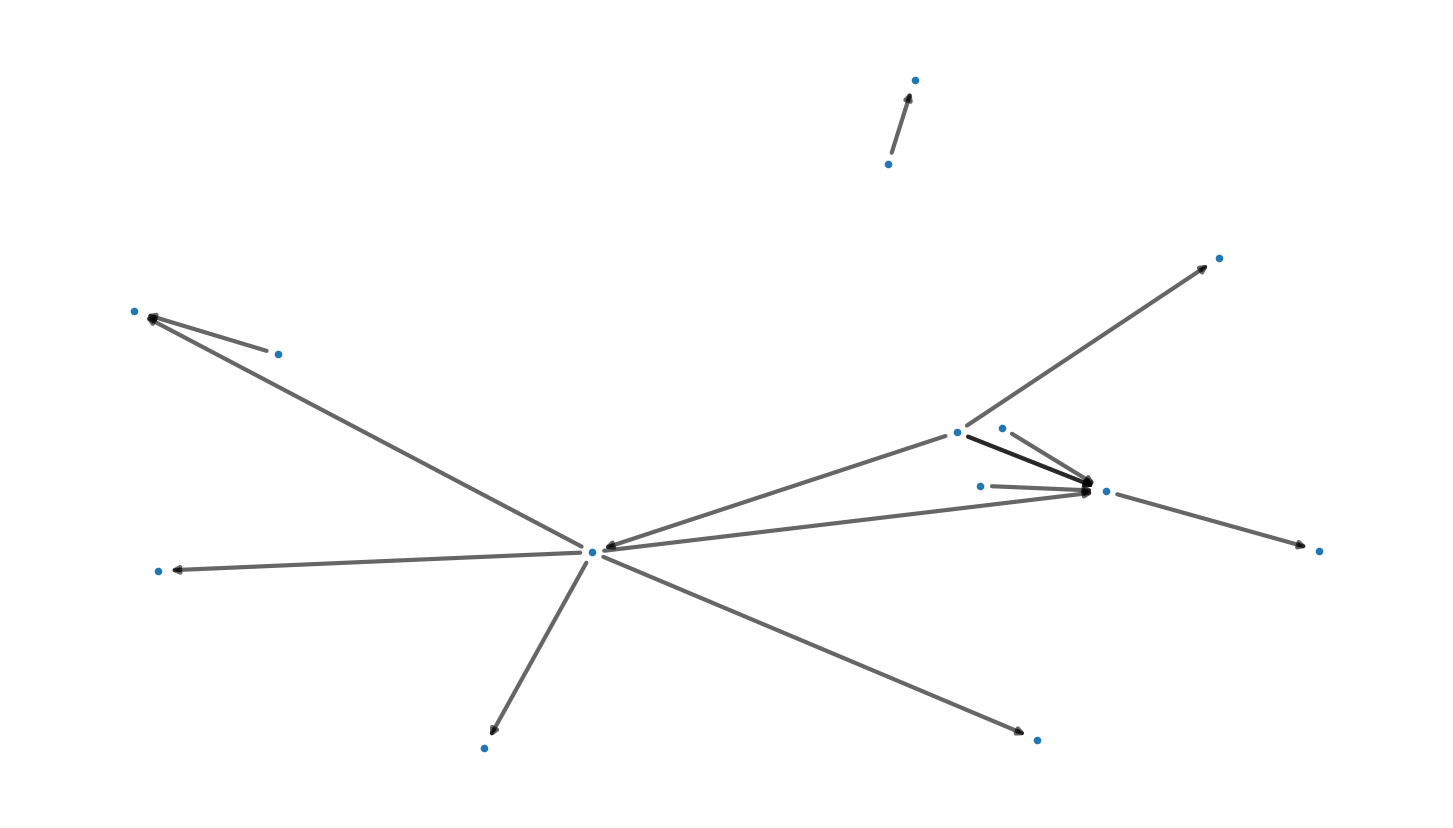

In [57]:
# Plot network
import networkx as nx
pos = nx.spring_layout(network.graph)
plt.axis("off")
nx.draw_networkx_nodes(network.graph, pos, node_size=20)
nx.draw_networkx_edges(network.graph, pos, alpha=0.6, width=3)

# Calculate number and size of weakly connected components
(cc_sizes, cc_number, cc_size_mean, cc_size_med, cc_size_sd, cc_size_max) = analyze.calculate_weakly_connected_components(network.graph)
print(
    f'The Speech Graph has {int(cc_number)} weakly connected components, with sizes of {cc_sizes}.')

print(
    f'\nMean size: {int(cc_size_mean)} ± {int(cc_size_sd)}\nMedian size: {int(cc_size_med)}\nMaximum size: {int(cc_size_max)}')

plt.gcf().set_size_inches(18.5, 10.5)
fig.savefig('./filename.png', transparent=True)



Weakly connected components appear to be informative about mental health disorders, showing differences in patients with first episode psychosis, people at clinical high risk of developing psychosis, and healthy controls. Read more about this [here](https://doi.org/10.1101/2022.02.25.22271517).

### 2.3 Advanced properties

To calculate all of the properties we have calculated previously, and additional features of the networks, netts provides a helper function. 

In [40]:
# Calculate all properties
graph_properties = analyze.calculate_all_properties(network.graph)

# Show all properties
from IPython.display import display, HTML
display(graph_properties)

,words,sentences,nodes,edges,unconnected,average_total_degree,parallel_edges,bidirectional_edges,L1,L2,...,connected_components,cc_size_mean,cc_size_med,cc_size_sd,cc_size_max,max_degree_centrality,max_degree_node,max_indegree_centrality_value,max_outdegree_centrality_value,mean_confidence
0,101,6,14,14,4,2.0,1,0,0,0,...,2,7.0,7.0,5.0,12,0.461538,man,0.384615,0.384615,0.457117


It returns a pandas dataframe which contains the following columns:

| Column Name                       | Description                                               |
| --------------------------------- | --------------------------------------------------------- |
| words                             | Number of words in the transcript                         |
| sentences                         | Number of sentences in the transcript                     |
| nodes                             | Number of nodes in the network                            |
| edges                             | Number of edges in the network                            |
| unconnected                       | Number of unconnected nodes in the network                |
| average_total_degree              | Average total degree of the network                       |
| parallel_edges                    | Number of parallel edges                                  |
| L1                                | Number of closed loops with one node (self-loops)         |
| L2                                | Number of closed loops with two nodes (self-loops)        |
| L3                                | Number of closed loops with three nodes                   |
| cc_size_mean                      | Mean size of weakly connected components                  |
| cc_size_med                       | Median size of weakly connected components                |
| cc_size_sd                        | Standard Deviation size of weakly connected components    |
| cc_size_max                       | Maximum size of weakly connected components               |
| max_degree_centrality             | Maximum degree centrality                                 |
| max_degree_node                   | Node label of node with highest degree                    |
| max_indegree_centrality_value     | Maximum Indegree centrality                               |
| max_outdegree_centrality_value    | Maximum Outdegree centrality                              |
| mean_confidence                   | Mean confidence value across all OpenIE extracted edges   |


## 3. Analysing several networks

Let's look at the structure of a group of networks and compare them with each other.

We start by importing a list of pickled networks, using the `import_graphs` of the netts analyze module. Then we loop through the networks and plot them each into a field of a larger plot. This will give us an idea of what these networks look like.

0 MultiDiGraph with 14 nodes and 14 edges
1 MultiDiGraph with 17 nodes and 22 edges
2 MultiDiGraph with 16 nodes and 18 edges
3 MultiDiGraph with 22 nodes and 20 edges
4 MultiDiGraph with 13 nodes and 12 edges
5 MultiDiGraph with 13 nodes and 10 edges


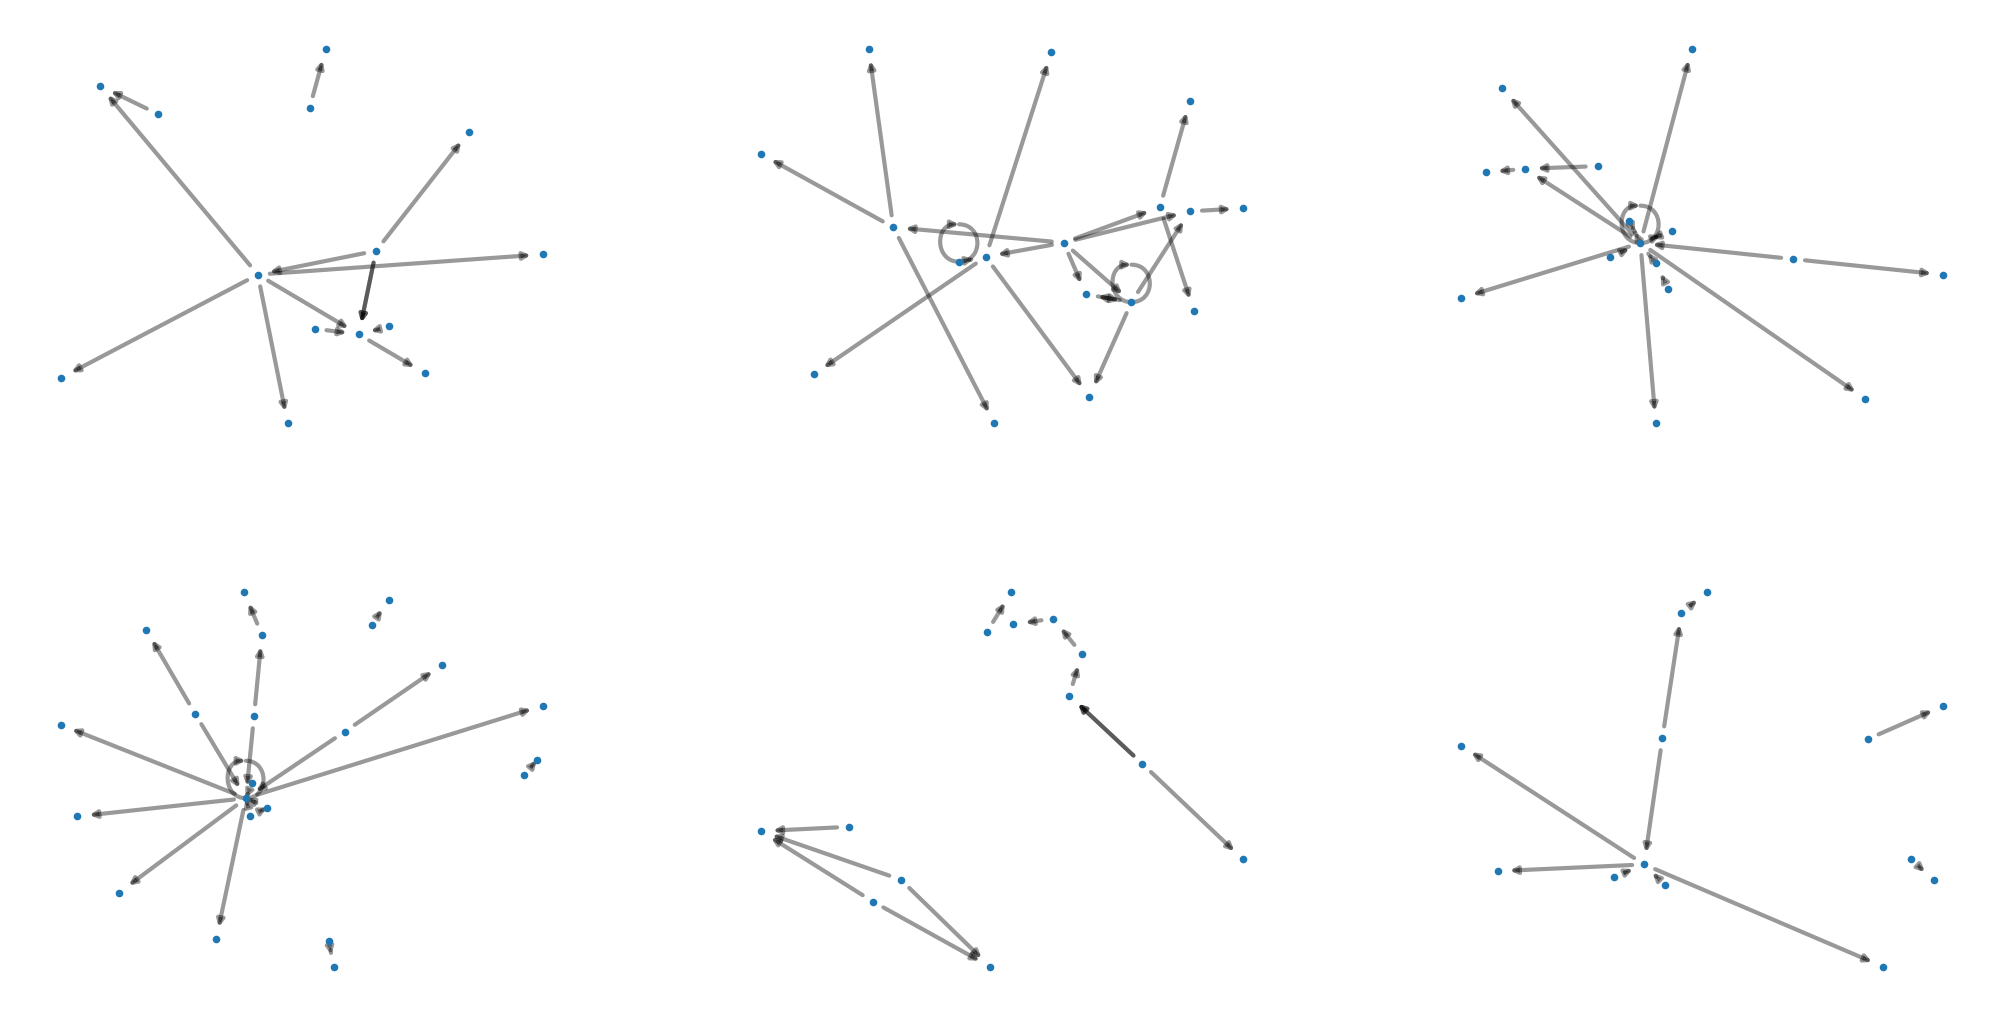

In [55]:
import glob
import netts.analyze as analyze
import networkx as nx
import numpy as np
import pandas as pd

# Import all networks
filelist = sorted(glob.glob('output_folder/transcript_*.pickle'))
networks = analyze.import_graphs(filelist)

# Plot all Networks
fig = plt.figure(figsize=(25.6, 20))
for g, G in enumerate(networks):
    print(g, G)
    ax = plt.subplot(int(np.ceil(np.sqrt(len(networks)))),
                     int(np.ceil(np.sqrt(len(networks)))), g + 1)
    pos = nx.spring_layout(G)
    plt.axis("off")
    nx.draw_networkx_nodes(G, pos, node_size=20)
    nx.draw_networkx_edges(G, pos, alpha=0.4, width=3)

# --- Optional: Save plot ---
output = 'output_folder/all_networks.png'
plt.savefig(output)
plt.show()


The `graph_properties` function calculates all properties we examined in the previous section for our list of network files and returns a dataframe with all of the properties.

In [42]:
data = analyze.graph_properties(filelist)
display(data)

# --- Optional: Save data ---
data.to_csv('output_folder/graph_properties.csv', index=False, sep=',')

,words,sentences,nodes,edges,unconnected,average_total_degree,parallel_edges,bidirectional_edges,L1,L2,...,cc_size_mean,cc_size_med,cc_size_sd,cc_size_max,max_degree_centrality,max_degree_node,max_indegree_centrality_value,max_outdegree_centrality_value,mean_confidence,filename
0,132,7,17,22,0,2.588235,0,4,2,1,...,17.0,17.0,0.0,17,0.4375,man,0.1875,0.375,0.460737,transcript_2.pickle


We can plot the number of nodes, edges, and other informative measures as histograms.

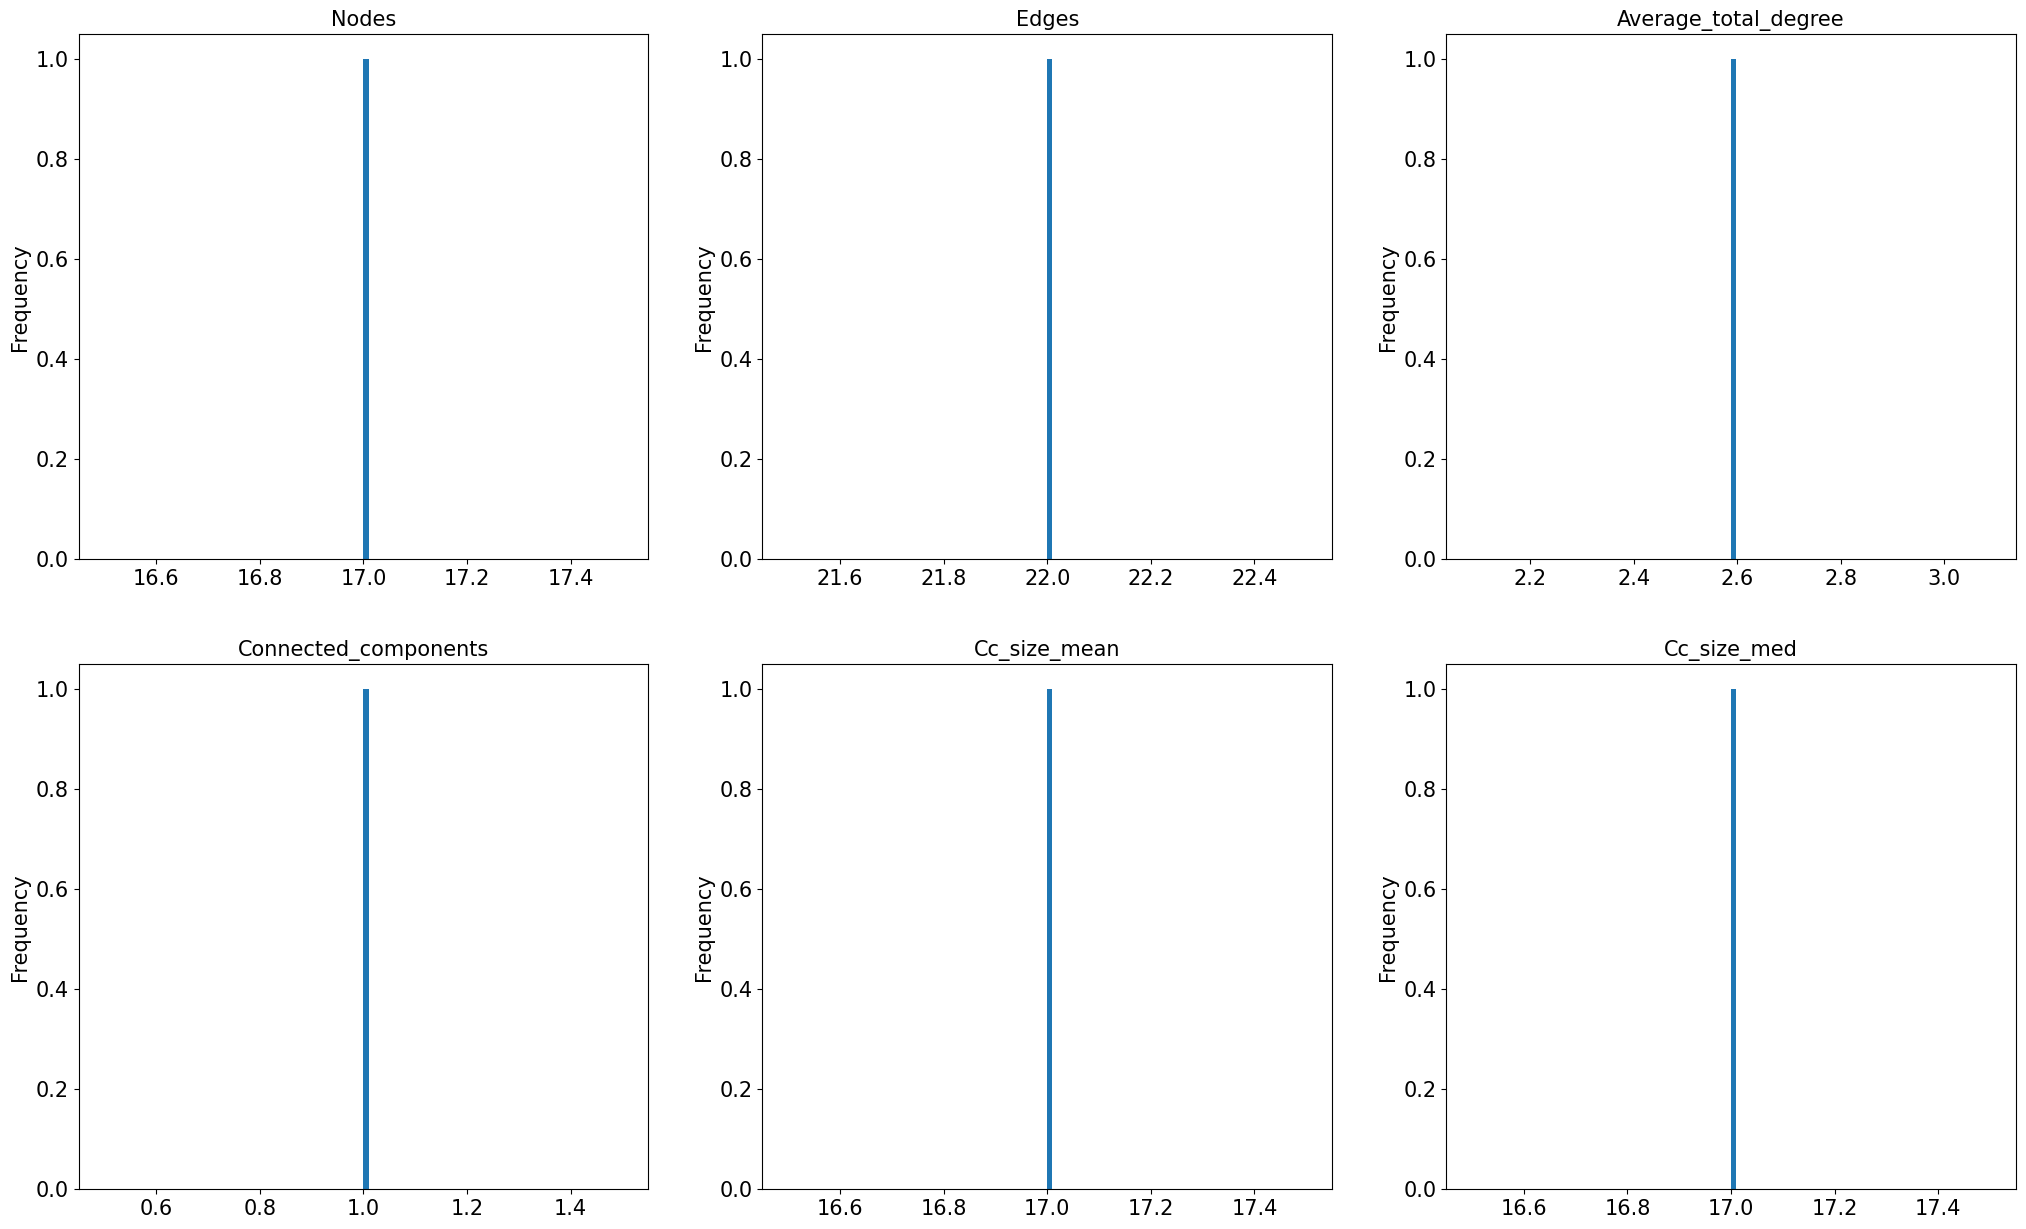

In [43]:
# ----------- Plot Histogram: Nodes, Edges, Average Total Degree, Connected Component number, mean and median size -----------

variable_list = ['nodes', 'edges', 'average_total_degree',
                 'connected_components', 'cc_size_mean', 'cc_size_med']

fig = plt.figure(figsize=(25, 15))
for v, variable in enumerate(variable_list):
    ax = plt.subplot(2, int(np.ceil(len(variable_list) / 2)), v + 1)
    plt.hist(data[variable], bins=100)
    plt.ylabel('Frequency', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(variable.capitalize(), fontsize=15)

Finally, let's look at a large dataset of speech networks that were generated from ~3000 speech transcripts from the general public collected in an online study. Calculating the features of all 3000 networks would take a few minutes. To save time, we import a dataframe that was generated using the `graph_properties` from netts and then saved as a csv file, as we did in the [previous section](#2.-Analysing-a-semantic-speech-network).

In the study, participants were presented with eight pictures and instructed to talk about each picture for one minute. In addition to the properties we have seen in previous sections, the dataframe indicates the participant in the *subj* column and the *stimulus_picture*.

In [44]:
data_prebaked = pd.read_csv('transcripts/prebaked_graph_properties.csv', sep=',')
display(data_prebaked)


,Unnamed: 0,subj,stimulus_picture,words,sentences,nodes,edges,unconnected,average_total_degree,parallel_edges,...,max_indegree_centrality_value,max_outdegree_centrality_value,mean_sentence_length,mean_confidence,std_confidence,density,diameter,average_shortest_path,clustering,consecutive_edges
0,0,3138838,10,113,5,16,18,4,2.250000,0,...,0.400000,0.600000,22.600000,0.515703,0.254636,0.133333,4,2.291667,0.000000,7
1,1,3138838,13,129,5,23,20,0,1.739130,0,...,0.272727,0.272727,25.800000,0.571675,0.255738,0.079051,5,2.375000,0.118538,5
2,2,3138838,30,119,6,21,20,2,1.904762,0,...,0.200000,0.300000,19.833333,0.501676,0.232276,0.095238,7,3.204678,0.013033,6
3,3,3138849,10,71,3,13,12,3,1.846154,1,...,0.250000,0.250000,23.666667,0.768180,0.198013,0.141026,5,2.333333,0.000000,2
4,4,3138849,13,97,7,25,20,1,1.600000,0,...,0.083333,0.208333,13.857143,0.497572,0.245393,0.066667,4,2.266667,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,2840,6373087,10,127,10,18,23,0,2.555556,2,...,0.235294,0.352941,12.700000,0.589329,0.230361,0.124183,5,2.901961,0.000000,11
2841,2841,6373087,13,155,12,24,26,4,2.166667,3,...,0.173913,0.260870,12.916667,0.396604,0.212513,0.079710,7,3.333333,0.000000,9
2842,2842,6373087,19,115,9,14,14,3,2.000000,0,...,0.230769,0.307692,12.777778,0.479902,0.238510,0.153846,5,2.769231,0.000000,5
2843,2843,6373087,8,108,9,20,21,2,2.100000,0,...,0.157895,0.263158,12.000000,0.528726,0.237325,0.110526,4,2.294872,0.025641,7


Now we can plot the distribution of properties we examined in previous sections for only six networks, for the large sample.

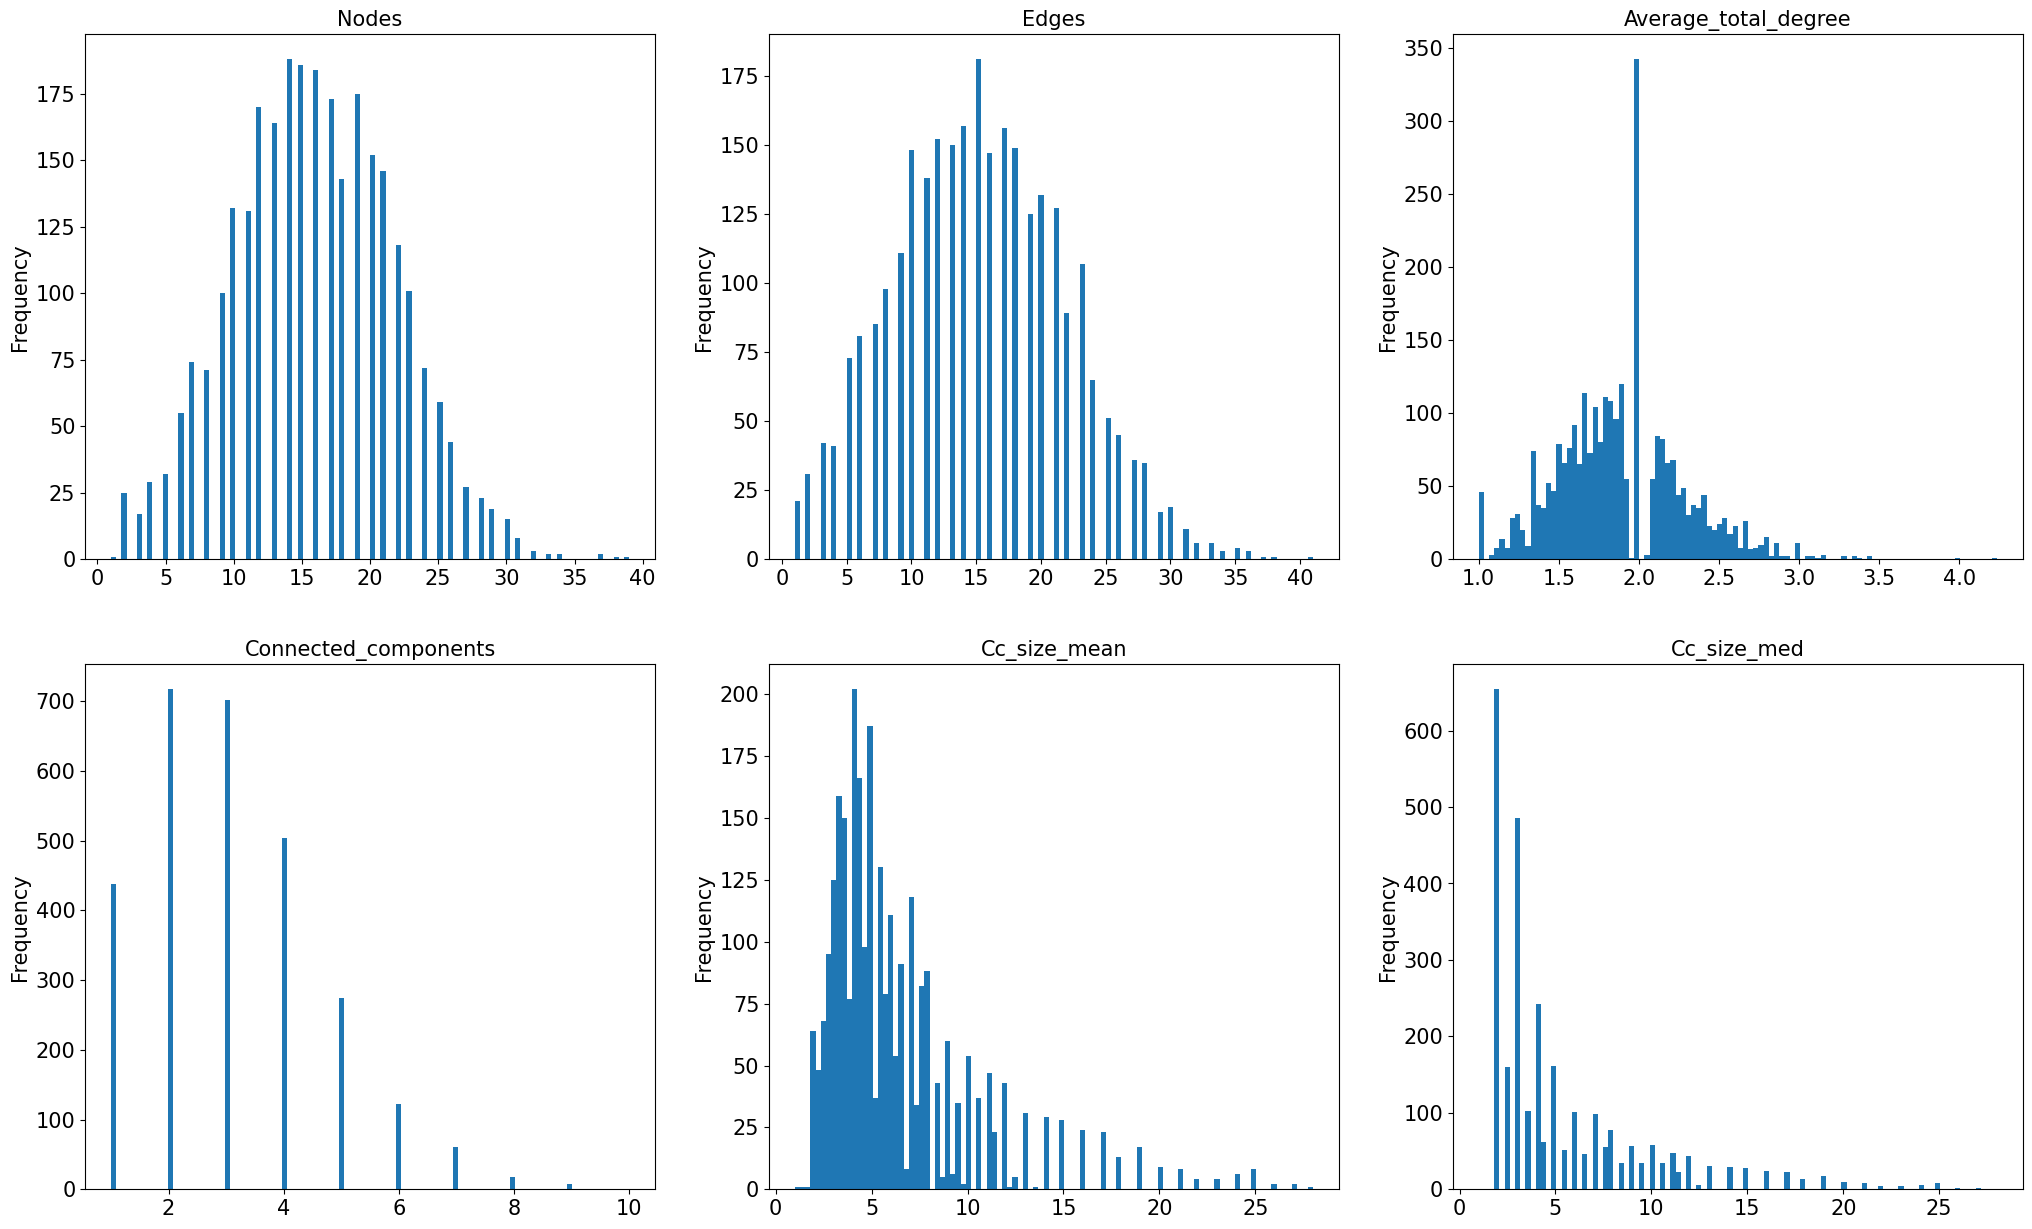

In [45]:
# ----------- Histogram: Nodes, Edges, Average Total Degree, Connected Component number, mean and median size -----------

variable_list = ['nodes', 'edges', 'average_total_degree',
                 'connected_components', 'cc_size_mean', 'cc_size_med']

fig = plt.figure(figsize=(25, 15))
for v, variable in enumerate(variable_list):
    ax = plt.subplot(2, int(np.ceil(len(variable_list) / 2)), v + 1)
    plt.hist(data_prebaked[variable], bins=100)
    plt.ylabel('Frequency', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(variable.capitalize(), fontsize=15)


That's a wrap! Hopefully this demo gave you an idea of how to use netts and how it might be useful for your research. Thank you for your interest!

If you have any questions or feedback, please feel free to [contact me](https://www.caroline-nettekoven.com/#contact).